In [67]:
# Imports, as always...
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fuck off the warnings, please.
import warnings
warnings.filterwarnings('ignore')

# For curve fitting.
from scipy.optimize import curve_fit

def logarithmic(x, a, b):
    return a * np.log(b * x + 1)

def square_root(x, a, b, c):
    return a * np.sqrt(b * x) + c

# Beautification.
sns.set_context('paper')
sns.set_style('darkgrid')
sns.set_palette('magma')

print(f'Installed Python version:  {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

Installed Python version:  3.8.18


In [15]:
# Read in the results.
hcm_results = pd.read_csv('./data/HCM-TCM/HCM_model_performance.csv')
tcm_results = pd.read_csv('./data/HCM-TCM/TCM_model_performance.csv')

In [33]:
# Custom colours.
colours = sns.color_palette('magma', n_colors=10)
hcm_colour, tcm_colour = colours[-3], colours[2]

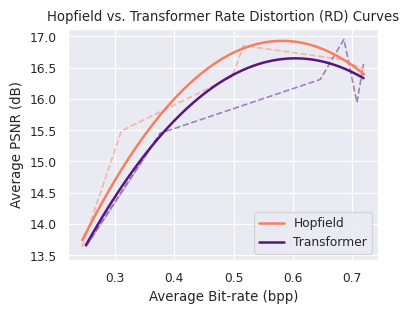

In [28]:
# First, a line plot.
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sns.lineplot(data=hcm_results, x='Average Bit-rate (bpp)', y='Average PSNR (dB)', color=hcm_colour, ax=ax, linestyle='--', alpha=.5)
sns.lineplot(data=tcm_results, x='Average Bit-rate (bpp)', y='Average PSNR (dB)', color=tcm_colour, ax=ax, linestyle='--', alpha=.5)
sns.regplot(data=hcm_results, x='Average Bit-rate (bpp)', y='Average PSNR (dB)', color=hcm_colour, ax=ax, label='Hopfield', ci=None, scatter=False, order=2)
sns.regplot(data=tcm_results, x='Average Bit-rate (bpp)', y='Average PSNR (dB)', color=tcm_colour, ax=ax, label='Transformer', ci=None, scatter=False, order=2)

ax.set_title('Hopfield vs. Transformer Rate Distortion (RD) Curves')
ax.legend(loc='lower right')

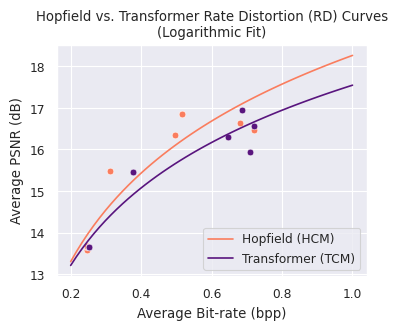

In [75]:
# Let's fit some curves to these fuckers.
hcm_log_params, _ = curve_fit(logarithmic, hcm_results['Average Bit-rate (bpp)'], hcm_results['Average PSNR (dB)'])
tcm_log_params, _ = curve_fit(logarithmic, tcm_results['Average Bit-rate (bpp)'], tcm_results['Average PSNR (dB)'])

# Create data points for the curves.
x = np.linspace(start=.2, stop=1, num=50)
hcm_log_y = logarithmic(x, hcm_log_params[0], hcm_log_params[1])
tcm_log_y = logarithmic(x, tcm_log_params[0], tcm_log_params[1])

# Plot.
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sns.scatterplot(data=hcm_results, x='Average Bit-rate (bpp)', y='Average PSNR (dB)', color=hcm_colour, ax=ax)
sns.lineplot(x=x, y=hcm_log_y, color=hcm_colour, ax=ax, label='Hopfield (HCM)')

sns.scatterplot(data=tcm_results, x='Average Bit-rate (bpp)', y='Average PSNR (dB)', color=tcm_colour, ax=ax)
sns.lineplot(x=x, y=tcm_log_y, color=tcm_colour, ax=ax, label='Transformer (TCM)')

ax.set_title('Hopfield vs. Transformer Rate Distortion (RD) Curves\n(Logarithmic Fit)')
ax.legend(loc='lower right')

plt.savefig('./misc-figures/HCM-TCM-RD-curve-(log-fit).pdf', bbox_inches='tight')

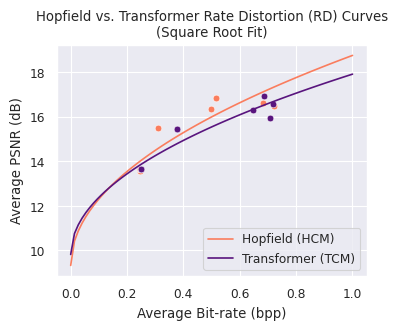

In [76]:
# Let's fit some curves to these fuckers.
hcm_sqrt_params, _ = curve_fit(square_root, hcm_results['Average Bit-rate (bpp)'], hcm_results['Average PSNR (dB)'])
tcm_sqrt_params, _ = curve_fit(square_root, tcm_results['Average Bit-rate (bpp)'], tcm_results['Average PSNR (dB)'])

# Create data points for the curves.
x = np.linspace(start=.0, stop=1, num=75)
hcm_sqrt_y = square_root(x, hcm_sqrt_params[0], hcm_sqrt_params[1], hcm_sqrt_params[2])
tcm_sqrt_y = square_root(x, tcm_sqrt_params[0], tcm_sqrt_params[1], tcm_sqrt_params[2])

# Plot.
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sns.scatterplot(data=hcm_results, x='Average Bit-rate (bpp)', y='Average PSNR (dB)', color=hcm_colour, ax=ax)
sns.lineplot(x=x, y=hcm_sqrt_y, color=hcm_colour, ax=ax, label='Hopfield (HCM)')

sns.scatterplot(data=tcm_results, x='Average Bit-rate (bpp)', y='Average PSNR (dB)', color=tcm_colour, ax=ax)
sns.lineplot(x=x, y=tcm_sqrt_y, color=tcm_colour, ax=ax, label='Transformer (TCM)')

ax.set_title('Hopfield vs. Transformer Rate Distortion (RD) Curves\n(Square Root Fit)')
ax.legend(loc='lower right')

plt.savefig('./misc-figures/HCM-TCM-RD-curve-(sqrt-fit).pdf', bbox_inches='tight')